# Pixels and Voxels
* Pixels are 2D picture elements
* Voxels are the 3D equivalent of pixels
* Two properties:
    * Intensity (brightness)
    * Spatial location (x,y,z)

## Data types and image size
array's data type controls range of possible intensities
* uint8: 0 to 255 - 256
* int8: -128 to 127 - 256
* uint16: 0 to 65535 - 65536
* int16: -32768 to 32767 - 65536
* float16: -65500 to 65500 - 65536 


In [5]:
import imageio
import numpy as np


im = imageio.imread('../../data/photos/lung.jpg')

print(im.dtype)
#print(im.dtype('uint8'))
print(im.size)

uint8
685404


C:\Users\aky\AppData\Local\Temp\ipykernel_27756\4121043897.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('../../data/photos/lung.jpg')


In [4]:
im_int64 = im.astype(np.uint64)
im_int64.size

685404

## Histograms
* Histograms: count number of pexil at each intensity value.
* implemented scipy.ndimage
    * higher-dimensional images
    * masked data
* Advanced techniques and functionality in scikit-image.

In [7]:
import scipy.ndimage as ndi

hist = ndi.histogram(im, min = 0, max = 255, bins = 256)
hist.shape

(256,)

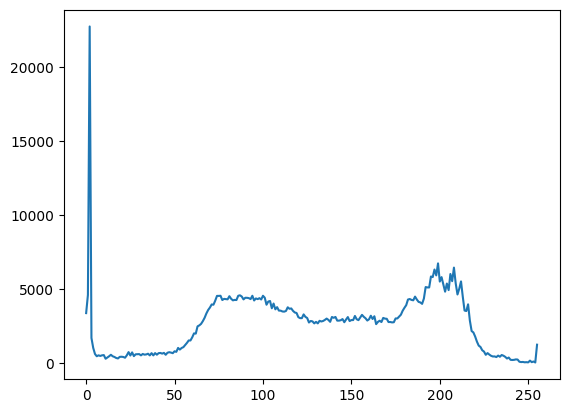

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist)
plt.show()

# Equalization
* Distribution often skewed toward low intensities (background values).
* Equalization: redistribute values to optimize full intensity range.
* Cumalative distribution function: (CDF) shows proportion of pixels in  range.

In [10]:
cdf = hist.cumsum()/ hist.sum()
cdf.shape

(256,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


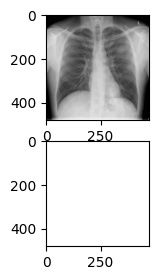

In [12]:
im_equalized = cdf[im] *255
fig, axes = plt.subplots(2, 1, figsize = (8, 3))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_equalized, cmap = 'gray')

plt.show()

In [ ]:
# Load the hand radiograph
im = imageio.imread('hand-xray.jpg')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.colorbar()
format_and_render_plot()

NameError: name 'format_and_render_plot' is not defined

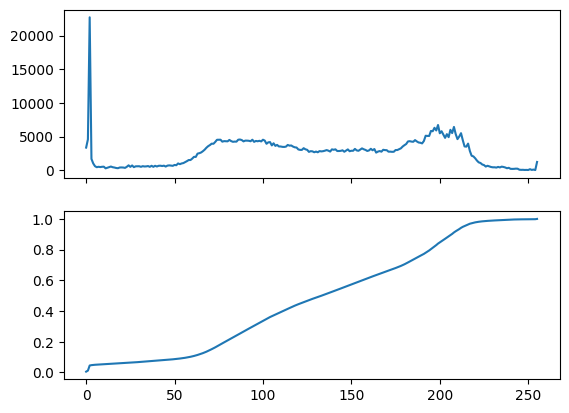

In [13]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min = 0, max = 255, bins = 256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()